In [1]:
!conda install -y -c conda-forge pyarrow python-snappy

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pyarrow
    - python-snappy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abseil-cpp-20200923.3      |       h9c3ff4c_0         955 KB  conda-forge
    arrow-cpp-3.0.0            |py38h140c071_10_cpu        21.6 MB  conda-forge
    aws-c-cal-0.4.5            |       h76129ab_8          35 KB  conda-forge
    aws-c-common-0.5.2         |       h7f98852_0         165 KB  conda-forge
    aws-c-event-stream-0.2.7   |       h6bac3ce_1          47 KB  conda-forge
    aws-c-io-0.9.1             |       ha5b09cb_1         119 KB  conda-forge
    aws-checksums-0.1.11       |       h99e32c3_3

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import matplotlib as mpl

## Summit cooling plant data

In [3]:
COOLING_PATH = "/gpfs/alpine/proj-shared/stf218/data/lake/summit_cooling_plant"

cooling_file = glob.glob(COOLING_PATH + "/*.parquet")

In [4]:
cooling_df = pd.read_parquet(cooling_file[0], engine="pyarrow").sort_index()

In [5]:
cooling_df.head(5)

,mtwst,cep_mtw_tons,almk100_leakdetection_alarm,k100_pue,cep_cooling_tower_tons,cep_outside_air_dry_bulb_temp,cep_outside_air_dew_point_temp,cep_make_up_flow,cep_outside_air_wet_bulb_temp,k100_space_temp_4,...,almepo_shutdown_alarm,cep_outside_air_rh,almmtw_makeup_emergency_shutdown_alarm,k100_total_power,cep_kw_per_ton,mtwflw,k100_space_temp_1,ct_water_flowrate,k100_space_temp_3,mtwrt
timestamp_utc,,,,,,,,,,,,,,,,,,,,,
2020-01-31 21:15:04,70.910156,2189.753662,0.0,1.273945,0.0,52.443222,37.895134,0.0,45.458000,74.785332,...,0.0,57.482128,0.0,5696.724121,0.712855,4343.891602,77.330818,0.0,75.376144,83.008545
2020-01-31 21:15:27,70.918228,2168.441406,0.0,1.275543,0.0,52.457367,37.797230,0.0,45.426201,74.795929,...,0.0,57.231300,0.0,5713.435547,0.726013,4312.183105,77.330818,0.0,75.348602,83.001266
2020-01-31 21:15:42,70.889786,2167.139893,0.0,1.278681,0.0,52.482094,37.766548,0.0,45.426201,74.789574,...,0.0,57.110207,0.0,5700.886230,0.734211,4293.492188,77.320221,0.0,75.329529,83.002884
2020-01-31 21:16:04,70.795486,2177.359375,0.0,1.272979,0.0,52.460892,37.801796,0.0,45.429733,74.776855,...,0.0,57.234161,0.0,5668.766602,0.710725,4285.313965,77.296921,0.0,75.295624,82.990372
2020-01-31 21:16:19,70.758934,2198.479736,0.0,1.271757,0.0,52.450294,37.868530,0.0,45.450928,74.768387,...,0.0,57.407043,0.0,5619.274902,0.694345,4318.357422,77.294800,0.0,75.280792,82.981873


In [6]:
cooling_df.tail(5)

,mtwst,cep_mtw_tons,almk100_leakdetection_alarm,k100_pue,cep_cooling_tower_tons,cep_outside_air_dry_bulb_temp,cep_outside_air_dew_point_temp,cep_make_up_flow,cep_outside_air_wet_bulb_temp,k100_space_temp_4,...,almepo_shutdown_alarm,cep_outside_air_rh,almmtw_makeup_emergency_shutdown_alarm,k100_total_power,cep_kw_per_ton,mtwflw,k100_space_temp_1,ct_water_flowrate,k100_space_temp_3,mtwrt
timestamp_utc,,,,,,,,,,,,,,,,,,,,,
2021-01-25 22:29:39,69.146515,2103.173340,0.0,1.032464,2250.517578,47.553215,46.926910,41.599998,47.224625,72.036957,...,0.0,97.666855,0.0,5156.959473,0.099998,5380.755859,75.426178,3298.677246,72.644737,78.525208
2021-01-25 22:29:50,69.144089,2126.177979,0.0,1.033352,2250.417725,47.507286,46.873745,42.133335,47.175163,72.022125,...,0.0,97.639709,0.0,5140.075195,0.100272,5430.487793,75.430412,3298.677246,72.655334,78.542755
2021-01-25 22:30:02,69.148254,2110.370850,0.0,1.033511,2251.145508,47.496681,46.869823,43.733334,47.168091,72.041199,...,0.0,97.664246,0.0,5075.697266,0.101781,5389.935059,75.430412,3298.677246,72.644737,78.545715
2021-01-25 22:30:19,69.154816,2114.762451,0.0,1.033763,2251.205322,47.489624,46.950890,40.533333,47.206963,72.020012,...,0.0,97.989616,0.0,5100.565430,0.102037,5396.777344,75.434654,3298.677246,72.646851,78.558792
2021-01-25 22:30:41,69.160446,2111.573975,0.0,1.032403,2250.063721,47.482552,46.930199,28.533333,47.192825,72.032730,...,0.0,97.939194,0.0,5194.798828,0.100197,5375.916016,75.447357,3298.892822,72.629898,78.578323


## Splitting timestamp for groupings

In [7]:
cooling_df['Year'] = cooling_df.index.year
cooling_df['Month'] = cooling_df.index.month
cooling_df['Week'] = cooling_df.index.week
cooling_df['Day'] = cooling_df.index.day

cooling_df.head(5)


<ipython-input-7-ffcfa5b7ee4f>:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  cooling_df['Week'] = cooling_df.index.week


,mtwst,cep_mtw_tons,almk100_leakdetection_alarm,k100_pue,cep_cooling_tower_tons,cep_outside_air_dry_bulb_temp,cep_outside_air_dew_point_temp,cep_make_up_flow,cep_outside_air_wet_bulb_temp,k100_space_temp_4,...,cep_kw_per_ton,mtwflw,k100_space_temp_1,ct_water_flowrate,k100_space_temp_3,mtwrt,Year,Month,Week,Day
timestamp_utc,,,,,,,,,,,,,,,,,,,,,
2020-01-31 21:15:04,70.910156,2189.753662,0.0,1.273945,0.0,52.443222,37.895134,0.0,45.458000,74.785332,...,0.712855,4343.891602,77.330818,0.0,75.376144,83.008545,2020,1,5,31
2020-01-31 21:15:27,70.918228,2168.441406,0.0,1.275543,0.0,52.457367,37.797230,0.0,45.426201,74.795929,...,0.726013,4312.183105,77.330818,0.0,75.348602,83.001266,2020,1,5,31
2020-01-31 21:15:42,70.889786,2167.139893,0.0,1.278681,0.0,52.482094,37.766548,0.0,45.426201,74.789574,...,0.734211,4293.492188,77.320221,0.0,75.329529,83.002884,2020,1,5,31
2020-01-31 21:16:04,70.795486,2177.359375,0.0,1.272979,0.0,52.460892,37.801796,0.0,45.429733,74.776855,...,0.710725,4285.313965,77.296921,0.0,75.295624,82.990372,2020,1,5,31
2020-01-31 21:16:19,70.758934,2198.479736,0.0,1.271757,0.0,52.450294,37.868530,0.0,45.450928,74.768387,...,0.694345,4318.357422,77.294800,0.0,75.280792,82.981873,2020,1,5,31


In [8]:
cooling_df.columns

Index(['mtwst', 'cep_mtw_tons', 'almk100_leakdetection_alarm', 'k100_pue',
       'cep_cooling_tower_tons', 'cep_outside_air_dry_bulb_temp',
       'cep_outside_air_dew_point_temp', 'cep_make_up_flow',
       'cep_outside_air_wet_bulb_temp', 'k100_space_temp_4',
       'k100_space_temp_2', 'mt_loop_diff_press', 'cep_chilled_water_tons',
       'chw_flowrate', 'almepo_shutdown_alarm', 'cep_outside_air_rh',
       'almmtw_makeup_emergency_shutdown_alarm', 'k100_total_power',
       'cep_kw_per_ton', 'mtwflw', 'k100_space_temp_1', 'ct_water_flowrate',
       'k100_space_temp_3', 'mtwrt', 'Year', 'Month', 'Week', 'Day'],
      dtype='object')

## Calculate maxs and mins for Total Power 

In [10]:
week_list = sorted(cooling_df["Week"].unique())

maxs = np.zeros(len(week_list))
mins = np.zeros(len(week_list))

for idx, wk in enumerate(week_list):    
    week_df = cooling_df[cooling_df["Week"] == wk] 
    
    maxs[idx] = week_df["k100_total_power"].max()
    
    new_min = week_df["k100_total_power"].min()
    if (new_min > 0):
        mins[idx] = new_min


## Convert from kW to MW

In [11]:
cooling_df["k100_total_power_mw"] = cooling_df["k100_total_power"] / 1000

maxs = maxs / 1000
mins = mins / 1000

In [24]:
plt.style.use("acm_ieee_latex_pubstyle.txt")

%matplotlib inline

# Initialize style
plt.style.use("acm_ieee_latex_pubstyle.txt")

plt.rcParams["axes.labelweight"] = "bold"

SINGLE_COLUMN = SINGLE_WIDTH = 8.0
DOUBLE_COLUMN = DOUBLE_WIDTH = 16.0

def width_height(width=SINGLE_COLUMN, height=None, columns=1, rows=1):
    """Width driven sizing for seaborn multi-grid layouts
    
    Derive height & aspect kwargs for facetgrid, pairgrid & friends with a target sizing
    in terms of width and height.  Convenient for creating figures that has
    to be fit into a certain width, while maintaining the correct aspect ratios of the fonts.
    Call this function to derive the height & aspect
    
    Currently, ACM & IEEE latex, single column figure defaults to a width of 8inch
    and the double column figure defaults to a width of 8 inch for the correct text scaling
    
    Usage:
    - sns.FacetGrid( ... , **width_height())

    :param width: target width in inches (4 inch for a single column figure is default)
    :param height: target heigth in inches (width * 3/4 - golden ratio is the default)
    :param columns: target # of columns for facetgrid
    :param rows: target # of rows for facetgrid
    """
    if height is None:
        height = width * 3/4
    ratio = float(width) / (float(height) / float(rows))
    return {"height": (float(width) / ratio), "aspect": ratio / float(columns)}

In [14]:
cooling_df.columns

week_list_np = np.array(week_list) - 1

print(week_list_np)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]


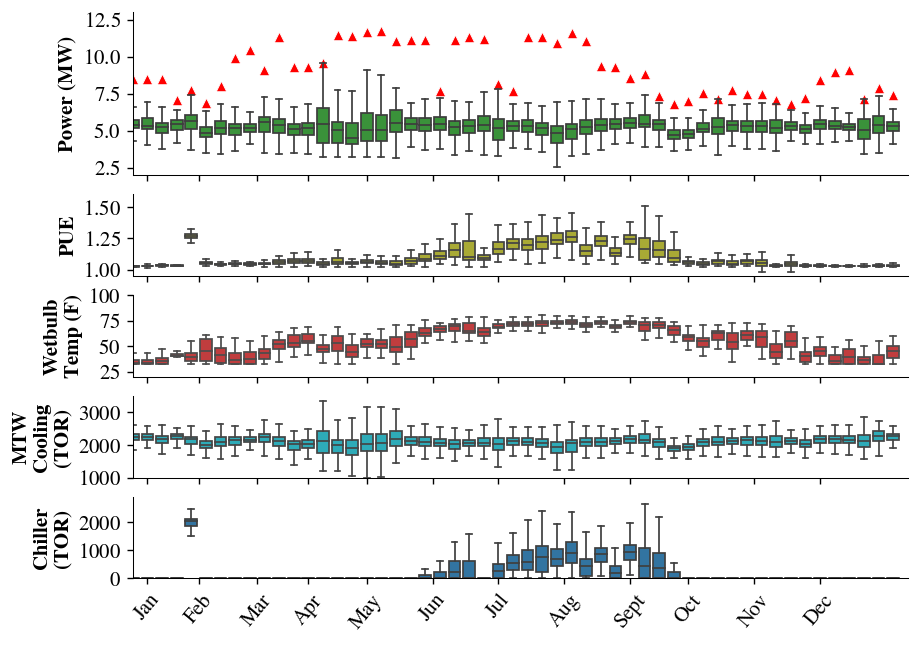

In [26]:
plt.close()

# Override acm-ieee-latex-pubstyle
plt.figure(figsize=(8,6))
sns.despine(top=False, right=False)
sns.set_context(rc = {'patch.linewidth': 0.0, 'axes.labelsize': 12})

# Layout
gs = mpl.gridspec.GridSpec(5, 1, height_ratios=[2, 1, 1, 1, 1]) 
gs.update(hspace=0.2)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
ax2 = plt.subplot(gs[2], sharex=ax0)
ax3 = plt.subplot(gs[3], sharex=ax0)
ax4 = plt.subplot(gs[4], sharex=ax0)

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)


# Power plot with maxs and mins
sns.scatterplot(x=(week_list_np), y=maxs, marker="^", color="r", ax=ax0)
sns.boxplot(data=cooling_df, x='Week', y='k100_total_power_mw', showfliers=False, ax=ax0, linewidth=1, color="tab:green")
ax0.set_ylabel("Power (MW)")
ax0.set(xlabel=None)
ax0.set_ylim([2, 13])
ax0.set_yticks([2.5, 5, 7.5, 10, 12.5])
    
# PUE plot
sns.boxplot(data=cooling_df, x='Week',y='k100_pue', showfliers=False, ax=ax1, linewidth=1, color="tab:olive")
ax1.set_ylabel("PUE")
ax1.set(xlabel=None)
ax1.set_ylim([0.95, 1.6])
ax1.set_yticks([1.0, 1.25, 1.5])

# Wet Bulb Temp plot
sns.boxplot(data=cooling_df, x='Week',y='cep_outside_air_wet_bulb_temp', showfliers=False, ax=ax2, linewidth=1, color="tab:red")
ax2.set_ylabel("Wetbulb\nTemp (F)")
ax2.set(xlabel=None)
ax2.set_ylim([20, 100])
ax2.set_yticks([25, 50, 75, 100])

# CEP Supply Tonage plot
sns.boxplot(data=cooling_df, x='Week',y='cep_mtw_tons', showfliers=False, ax=ax3, linewidth=1, color="tab:cyan")
ax3.set_ylabel("MTW\nCooling\n(TOR)")
ax3.set(xlabel=None)
ax3.set_ylim([1000, 3500])
ax3.set_yticks([1000, 2000, 3000])

# CEP Chilled Water Tonage plot
sns.boxplot(data=cooling_df, x='Week',y='cep_chilled_water_tons', showfliers=False, ax=ax4, linewidth=1, color="tab:blue")
#sns.boxplot(data=cooling_df, x='Week',y='cep_cooling_tower_tons', showfliers=False, ax=ax4)
ax4.set_ylabel("Chiller\n(TOR)")
ax4.set_ylim([0, 2900])
ax4.set_yticks([0, 1000, 2000])

# Prepare x-axis for all 5 plots
ax4.set_xlim(0, 53, 10)
ax4.set_xlabel("")

my_xticks = [1, 4.5, 8.5, 12, 16, 20.5, 25, 29.5, 34, 38, 42.5, 47]
my_xtick_labels= ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"] 

plt.xticks(my_xticks, my_xtick_labels)

for item in ax4.get_xticklabels():
    item.set_rotation(50)

plt.subplots_adjust(hspace=.0)
plt.savefig("Summit_2020_Time_vs_Power_PUE_Cooling_formatted.pdf", format="pdf", bbox_inches='tight', pad_inches=0.01)
plt.show()